In [1]:

import numpy as np
import pandas as pd



In [2]:

churn_data = pd.read_csv('/content/churn_data.csv')
customer_data =pd.read_csv('/content/customer_data.csv')
internet_data = pd.read_csv('/content/internet_data.csv')

In [3]:

df_1 = pd.merge(churn_data,customer_data,how='inner',on='customerID')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [4]:

telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')


In [5]:

telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [6]:

telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [8]:

listp= ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

telecom[listp] = telecom[listp].apply(binary_map)    

In [9]:

dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
telecom = pd.concat([telecom, dummy1], axis=1)

ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')

ml1 =ml.drop(['MultipleLines_No phone service'],1)

telecom =(pd.concat([telecom,ml1],axis=1))



os =  pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')

os1=  os.drop(['OnlineSecurity_No internet service'],1)

telecom = (pd.concat([telecom,os1],axis=1))


ob = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')

ob1 =  ob.drop(['OnlineBackup_No internet service'],1)

telecom = (pd.concat([telecom,ob1],axis=1))


dp = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')

dp1 =  dp.drop(['DeviceProtection_No internet service'],1)

telecom =(pd.concat([telecom,dp1],axis=1))


ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')

ts1 = ts.drop(['TechSupport_No internet service'],1)

telecom = (pd.concat([telecom,ts1],axis=1))

st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')

st1 = st.drop(['StreamingTV_No internet service'],1)

telecom = (pd.concat([telecom,st1],axis=1))

sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')

sm1 = sm.drop(['StreamingMovies_No internet service'],1)

telecom =(pd.concat([telecom,sm1],axis=1))


In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [11]:

telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)


In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [13]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [14]:


telecom[['TotalCharges']]=telecom[['TotalCharges']].apply(pd.to_numeric, errors='coerce')


In [15]:

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

In [16]:

num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [17]:

num_telecom.quantile([.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
0.25,9.0,35.500,0.0,401.4500
0.50,29.0,70.350,0.0,1397.4750
0.75,55.0,89.850,0.0,3794.7375
0.90,69.0,102.600,1.0,5976.6400
0.95,72.0,107.400,1.0,6923.5900
0.99,72.0,114.729,1.0,8039.8830


In [18]:

telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [19]:

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [20]:

telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [21]:

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [22]:

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [23]:

df = pd.DataFrame(telecom, columns= ['tenure','MonthlyCharges','TotalCharges'])

In [24]:


std_df=(df-df.mean())/df.std()

In [25]:

telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

In [26]:

telecom = pd.concat([telecom,std_df],axis=1)

In [27]:

telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1.368012,1.357835,2.012201


In [28]:

churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100


In [29]:

churn

26.578498293515356

In [30]:

X = telecom.drop(['customerID','Churn'], axis=1)


y = telecom['Churn']

In [31]:

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:

from sklearn.model_selection import train_test_split

In [34]:


X=sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [35]:
y_train.shape

(4922,)

In [36]:
X_train.shape

(4922, 31)

In [37]:

logm1 = sm.Logit(y_train,X_train)


logm1.fit().summary()


Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 28


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.2912
Time:                        16:13:09   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6600   1.86e+06  -1.43e-06      1.000   -3.64e+06    3.64e+06
PhoneService                              0.8213    4.6e+05   1.79e-06      1.000   -9.01e+05    9.01e+05
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -4.0530   1.82e+06  -2.23e-06      1.000   -3.56e+06    3.56e+06
MultipleLines_No                          0.1295   3.02e+05   4.29e-07      1.000   -5.92e+05    5.92e+05
MultipleLines_Yes                         0.6918   3.75e+05   1.85e-06      1.000   -7.35e+05    7.35e+05
OnlineSecurity_No                        -0.9998   1.41e+06  -7.11e-07      1.000   -2.75e+06    2.75e+06
OnlineSecurity_Yes                       -1.0243   1.44e+06  -7.12e-07      1.000   -2.82e+06    2.82e+06
OnlineBackup_No                           0.7787   6.82e+05   1.14e-06      1.000   -1.34e+06    1.34e+06
OnlineBackup_Yes                          0.9528   1.26e+06   7.56e-07      1.000   -2.47e+06    2.47e+06
DeviceProtection_No                       0.0608        nan        nan        nan         nan         nan
DeviceProtection_Yes                      0.3837        nan        nan        nan         nan         nan
TechSupport_No                           -0.1521        nan        nan        nan         nan         nan
TechSupport_Yes                          -0.1825        nan        nan        nan         nan         nan
StreamingTV_No                           -0.6155        nan        nan        nan         nan         nan
StreamingTV_Yes                           0.3443        nan        nan        nan         nan         nan
StreamingMovies_No                       -0.3459        nan        nan        nan         nan         nan
StreamingMovies_Yes                       0.5024        nan  

In [38]:
X_train.shape

(4922, 31)

In [39]:

X = X.drop(['Partner','Dependents','PaymentMethod_Electronic check','gender_Male','InternetService_No','DeviceProtection_No','DeviceProtection_Yes'],axis=1)
X

,const,PhoneService,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,1.0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,1.0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,1.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,1.0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,1.0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,1.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,1.0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033


In [40]:
X_train.shape

(4922, 31)

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns



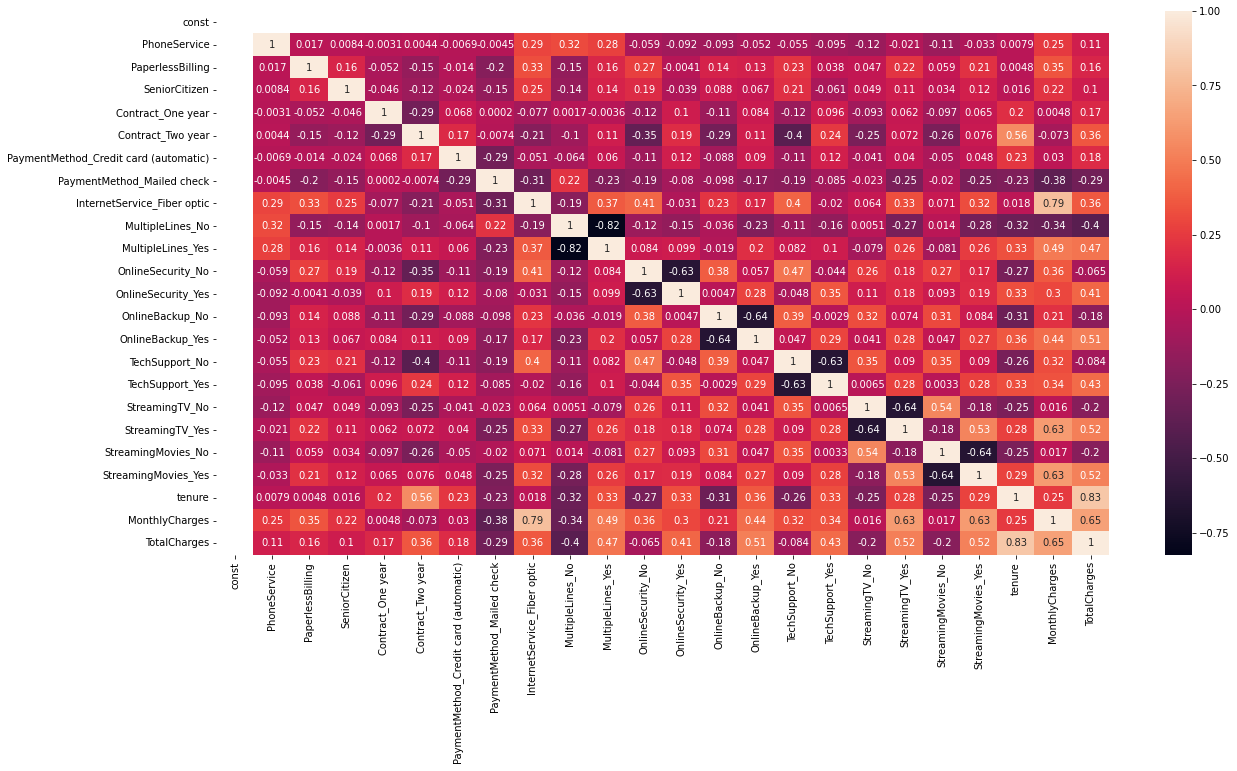

In [42]:

plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot = True)
plt.show()


In [43]:

def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
         if abs(corr_matrix.iloc[i,j])> threshold:
           colname=corr_matrix.columns[i]
           col_corr.add(colname)


     
    
    
    
    return col_corr

In [44]:

corr_features = correlation(X,0.7)


len(set(corr_features))

3

In [45]:

print(corr_features)


{'TotalCharges', 'MonthlyCharges', 'MultipleLines_Yes'}


In [46]:


X=X.drop(['TotalCharges', 'MonthlyCharges', 'MultipleLines_Yes'],axis=1)
X

,const,PhoneService,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,MultipleLines_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure
0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,-1.280157
1,1.0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0.064298
2,1.0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,-1.239416
3,1.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0.512450
4,1.0,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,-1.239416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,-0.343113
7039,1.0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1.612459
7040,1.0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,-0.872746
7041,1.0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,-1.157934


In [47]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif["variables"] =X.columns

vif["VIF"] =  [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [48]:

print(vif)

                                variables        VIF
0                                   const  26.342007
1                            PhoneService   1.451676
2                        PaperlessBilling   1.205664
3                           SeniorCitizen   1.111546
4                       Contract_One year   1.604685
5                       Contract_Two year   2.585350
6   PaymentMethod_Credit card (automatic)   1.167402
7              PaymentMethod_Mailed check   1.368714
8             InternetService_Fiber optic   1.988001
9                        MultipleLines_No   1.456002
10                      OnlineSecurity_No        inf
11                     OnlineSecurity_Yes        inf
12                        OnlineBackup_No        inf
13                       OnlineBackup_Yes        inf
14                         TechSupport_No        inf
15                        TechSupport_Yes        inf
16                         StreamingTV_No        inf
17                        StreamingTV_Yes     

In [49]:

X= X.drop(['OnlineSecurity_No','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_Yes','TechSupport_No','TechSupport_Yes','StreamingTV_No','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_Yes'],axis=1)



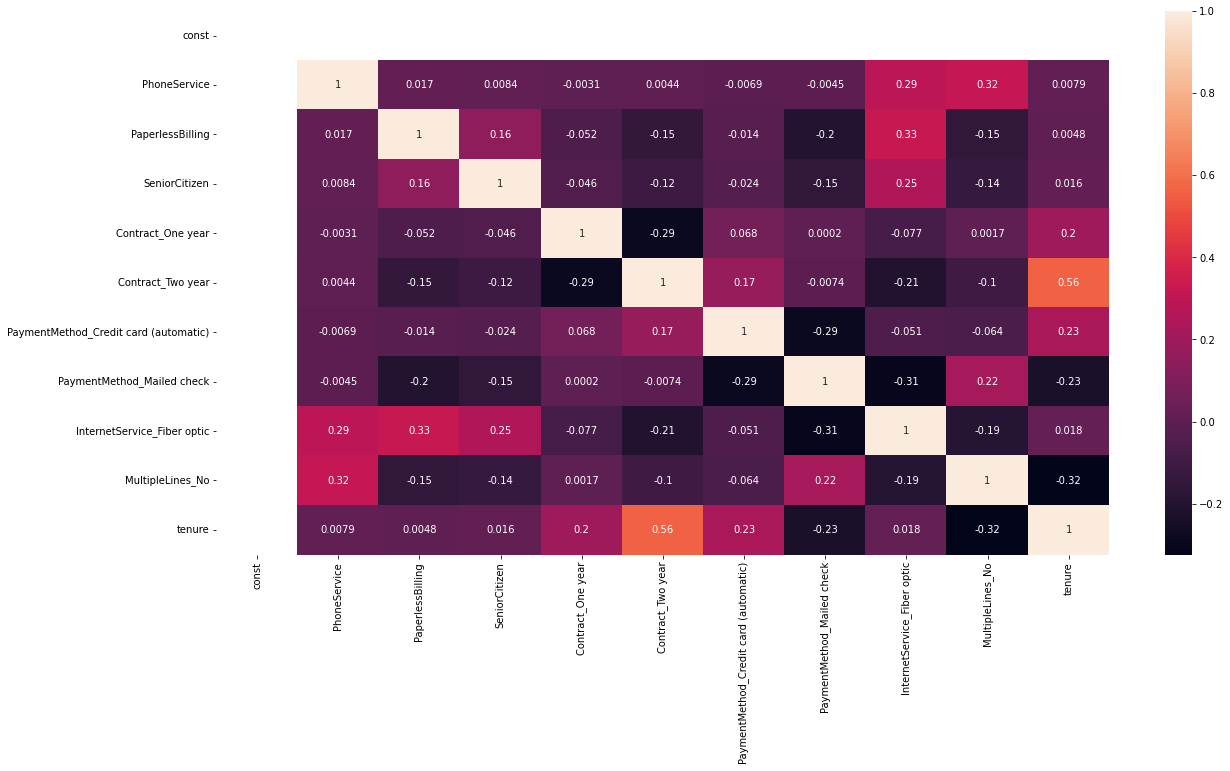

In [50]:

plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot = True)
plt.show()


In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


logm2 = sm.Logit(y_train,X_train)

logm2.fit().summary()


Optimization terminated successfully.
         Current function value: 0.417905
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.2727
Time:                        16:13:13   Log-Likelihood:                -2056.9
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2686      0.151     -8.421      0.000      -1.564      -0.973
PhoneService                             -0.4334      0.156     -2.771      0.006      -0.740      -0.127
PaperlessBilling                          0.4239      0.088      4.831      0.000       0.252       0.596
SeniorCitizen                             0.4801      0.099      4.830      0.000       0.285       0.675
Contract_One year                        -0.7379      0.124     -5.973      0.000      -0.980      -0.496
Contract_Two year                        -1.4344      0.203     -7.076      0.000      -1.832      -1.037
PaymentMethod_Credit card (automatic)    -0.4385      0.112     -3.927      0.000      -0.657      -0.220
PaymentMethod_Mailed check               -0.4864      0.107     -4.560      0.000      -0.695      -0.277
InternetService_Fiber optic               1.2979      0.099     13.065      0.000       1.103       1.493
MultipleLines_No                         -0.3268      0.094     -3.487      0.000      -0.511      -0.143
tenure                                   -0.9134      0.063    -14.468      0.000      -1.037      -0.790
=========================================================================================================
"""

In [52]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

 
rfe = RFE(logreg)       


rfe = rfe.fit(X_train,y_train) 


print("Selected Features: %s" % rfe.support_)     

print("Feature Ranking: %s" % rfe.ranking_)           

Selected Features: [False  True False False  True  True False False  True False  True]
Feature Ranking: [7 1 3 2 1 1 5 4 1 6 1]


In [53]:

for feature in rfe.support_.nonzero():
  print(X_train.columns[feature])

Index(['PhoneService', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'tenure'],
      dtype='object')


In [54]:

col = X_train.drop(['const', 'PaperlessBilling', 'SeniorCitizen',
       'PaymentMethod_Credit card (automatic)', 'MultipleLines_No','PaymentMethod_Mailed check'],axis=1)
col.head()

,PhoneService,Contract_One year,Contract_Two year,InternetService_Fiber optic,tenure
879,1,0,0,0,0.023557
5790,0,0,0,0,0.308744
6498,1,0,0,1,-1.280157
880,1,0,0,1,-0.913487
2784,1,0,0,1,-1.157934


In [55]:
y_train.shape

(4922,)

In [56]:
X_test.shape

(2110, 11)

In [57]:


logsk =LogisticRegression()


logsk.fit(col,y_train)

LogisticRegression()

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
logm3 = sm.Logit(y_train,col)

res=logm3.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.435736
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.2417
Time:                        16:13:14   Log-Likelihood:                -2144.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                1.009e-294
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PhoneService                   -1.6604      0.085    -19.428      0.000      -1.828      -1.493
Contract_One year              -1.2033      0.115    -10.497      0.000      -1.428      -0.979
Contract_Two year              -2.1243      0.192    -11.050      0.000      -2.501      -1.748
InternetService_Fiber optic     1.6316      0.089     18.334      0.000       1.457       1.806
tenure                         -0.6128      0.053    -11.648      0.000      -0.716      -0.510
===============================================================================================
"""

In [59]:

y_pred =  res.predict(col)
y_pred.head()

879     0.157780
5790    0.452844
6498    0.680409
880     0.629709
2784    0.663908
dtype: float64

In [60]:

y_pred_df = y_pred.values.reshape(-1)
y_pred_df

array([0.1577798 , 0.4528435 , 0.68040914, ..., 0.11162219, 0.10714298,
       0.1577798 ])

In [61]:

y_test_df = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_pred_df})

In [62]:

y_test_df['CustID'] = y_train.index
y_test_df.head()

,Churn,Churn_Prob,CustID
0,0,0.157780,879
1,0,0.452844,5790
2,1,0.680409,6498
3,1,0.629709,880
4,1,0.663908,2784


In [63]:

y_test_df['predicted'] =y_test_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [64]:

y_test_df.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.157780,879,0
1,0,0.452844,5790,0
2,1,0.680409,6498,1
3,1,0.629709,880,1
4,1,0.663908,2784,1


In [65]:

from sklearn import metrics

In [66]:

confusion = metrics.confusion_matrix(y_test_df.Churn, y_test_df.predicted )
print(confusion)


[[3128  507]
 [ 550  737]]


In [67]:

print(metrics.accuracy_score(y_test_df.Churn, y_test_df.predicted))

0.7852498984152784


In [68]:


TP =  confusion[0,0]
print(TP)
TN = confusion[1,0]
print(TN)
FP = confusion[0,1]
print(FP)
FN = confusion[1,1]
print(FN)

3128
550
507
737


In [69]:

sensitivity = TP/(TP+TN)

In [70]:

print(sensitivity)

0.8504622077215879


In [71]:

FPR =FP/(FN+FP)
print(FPR)

0.407556270096463


In [72]:

print(TP/(TP+FP))

0.8605226960110042


In [73]:

print(TP/(TP+FN))

0.8093143596377749


In [74]:

from sklearn.metrics import classification_report

print(classification_report(y_test_df.Churn,y_test_df.predicted, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3635
           1       0.59      0.57      0.58      1287

    accuracy                           0.79      4922
   macro avg       0.72      0.72      0.72      4922
weighted avg       0.78      0.79      0.78      4922



In [75]:


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

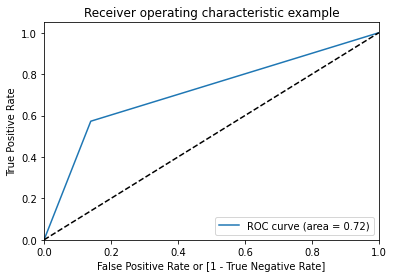

(array([0.       , 0.1394773, 1.       ]),
 array([0.        , 0.57264957, 1.        ]),
 array([2, 1, 0]))

In [76]:

draw_roc(y_test_df.Churn,y_test_df.predicted)


In [77]:
 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_df[i]= y_test_df.predicted.map(lambda x: 1 if x > i else 0)

    

y_test_df.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157780,879,0,0,0,0,0,0,0,0,0,0,0
1,0,0.452844,5790,0,0,0,0,0,0,0,0,0,0,0
2,1,0.680409,6498,1,1,1,1,1,1,1,1,1,1,1
3,1,0.629709,880,1,1,1,1,1,1,1,1,1,1,1
4,1,0.663908,2784,1,1,1,1,1,1,1,1,1,1,1


In [78]:

cutoff_df =  pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


for i in num:
    
    cm1 =metrics.confusion_matrix( y_test_df.Churn,  y_test_df[i] )
    
    
    total1=sum(sum(cm1))
    
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy    sensi     speci
0.0   0.0   0.78525  0.57265  0.860523
0.1   0.1   0.78525  0.57265  0.860523
0.2   0.2   0.78525  0.57265  0.860523
0.3   0.3   0.78525  0.57265  0.860523
0.4   0.4   0.78525  0.57265  0.860523
0.5   0.5   0.78525  0.57265  0.860523
0.6   0.6   0.78525  0.57265  0.860523
0.7   0.7   0.78525  0.57265  0.860523
0.8   0.8   0.78525  0.57265  0.860523
0.9   0.9   0.78525  0.57265  0.860523


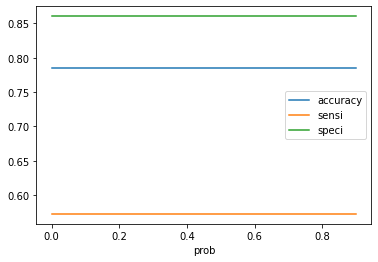

In [79]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [80]:


y_test_df['final_predicted'] =  y_test_df.predicted.map( lambda x: 1 if x > 0.3 else 0)

In [81]:

y_test_df.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157780,879,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.452844,5790,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.680409,6498,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.629709,880,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.663908,2784,1,1,1,1,1,1,1,1,1,1,1,1


In [82]:

metrics.accuracy_score(y_test_df.Churn, y_test_df.final_predicted)

0.7852498984152784

In [83]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


In [84]:

from sklearn.linear_model import LogisticRegression

logs2 =LogisticRegression()

logs2.fit(X_train,y_train)

y_pred= logs2.predict(X_test)

In [85]:

from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1651
           1       0.52      0.66      0.58       459

    accuracy                           0.79      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.81      0.79      0.80      2110



In [86]:

from sklearn.metrics import confusion_matrix
confusion =confusion_matrix(y_pred,y_test)
print(confusion)

[[1370  281]
 [ 158  301]]
